# Practice


In [22]:
import numpy as np
import pandas as pd
import pickle
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
import matplotlib.pyplot as pyplot

In [23]:
data = pd.read_csv('./cardata/audi.csv', sep=',', skipinitialspace=True)
data = data[["model", "year", "price", "transmission", "mileage", "fuelType", "engineSize"]]
predict = "price"

dummy = pd.get_dummies(data, columns=['model', 'transmission', 'fuelType'], prefix="dmy")
print(dummy.drop([predict], 1).keys()) # prints all model fields needed for every manufacturer

X = np.array(dummy.drop([predict], 1))
y = np.array(dummy[predict])
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.1)

Index(['year', 'mileage', 'engineSize', 'dmy_A1', 'dmy_A2', 'dmy_A3', 'dmy_A4',
       'dmy_A5', 'dmy_A6', 'dmy_A7', 'dmy_A8', 'dmy_Q2', 'dmy_Q3', 'dmy_Q5',
       'dmy_Q7', 'dmy_Q8', 'dmy_R8', 'dmy_RS3', 'dmy_RS4', 'dmy_RS5',
       'dmy_RS6', 'dmy_RS7', 'dmy_S3', 'dmy_S4', 'dmy_S5', 'dmy_S8', 'dmy_SQ5',
       'dmy_SQ7', 'dmy_TT', 'dmy_Automatic', 'dmy_Manual', 'dmy_Diesel',
       'dmy_Hybrid', 'dmy_Petrol'],
      dtype='object')


/var/folders/t3/l3sq8rr96kd2f33_6q8py6f00000gn/T/ipykernel_26509/311808949.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  print(dummy.drop([predict], 1).keys()) # prints all model fields needed for every manufacturer
/var/folders/t3/l3sq8rr96kd2f33_6q8py6f00000gn/T/ipykernel_26509/311808949.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(dummy.drop([predict], 1))


In [24]:

best = 0
for _ in range(10):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.1)

    model = RandomForestRegressor(n_estimators=100, max_features=7)
    model.fit(x_train, y_train)

    acc = model.score(x_test, y_test)
    if acc > best:
        best = acc
        with open("audimodel.pickle", "wb") as f:
            pickle.dump(model, f)
print(best)

pickle_in = open("audimodel.pickle", "rb")
linear = pickle.load(pickle_in)

0.953168579675258


In [25]:
predictions = model.predict(x_test)
for x in range(len(predictions)):
    print(predictions[x], y_test[x], x_test[x])

29538.543809523817 32880 [2.020e+03 4.521e+03 2.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00]
15256.59 18995 [2.0160e+03 3.4728e+04 2.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 1.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00]
13764.953571428572 12995 [2.017e+03 1.890e+04 1.400e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000

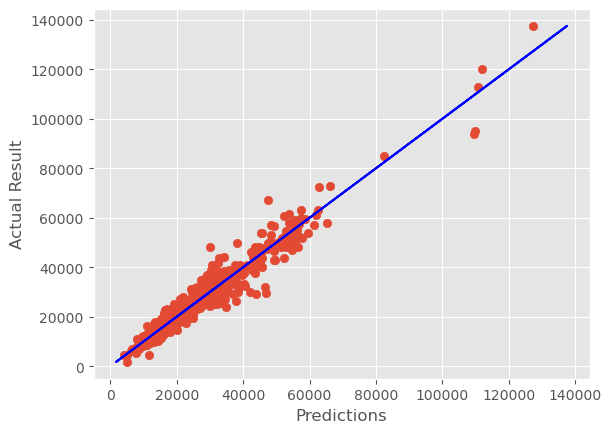

In [26]:
p = 'Predictions'
pyplot.style.use("ggplot")
pyplot.scatter(predictions, y_test)
pyplot.plot(y_test,y_test,color='blue')
pyplot.xlabel(p)
pyplot.ylabel("Actual Result")
pyplot.show()

In [27]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(dummy.columns.tolist())
    print(dummy.head(2))

   year  price  mileage  engineSize  dmy_A1  dmy_A2  dmy_A3  dmy_A4  dmy_A5  \
0  2017  12500    15735         1.4       1       0       0       0       0   
1  2016  16500    36203         2.0       0       0       0       0       0   

   dmy_A6  dmy_A7  dmy_A8  dmy_Q2  dmy_Q3  dmy_Q5  dmy_Q7  dmy_Q8  dmy_R8  \
0       0       0       0       0       0       0       0       0       0   
1       1       0       0       0       0       0       0       0       0   

   dmy_RS3  dmy_RS4  dmy_RS5  dmy_RS6  dmy_RS7  dmy_S3  dmy_S4  dmy_S5  \
0        0        0        0        0        0       0       0       0   
1        0        0        0        0        0       0       0       0   

   dmy_S8  dmy_SQ5  dmy_SQ7  dmy_TT  dmy_Automatic  dmy_Manual  dmy_Diesel  \
0       0        0        0       0              0           1           0   
1       0        0        0       0              1           0           1   

   dmy_Hybrid  dmy_Petrol  
0           0           1  
1           0   